In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import graphviz
from collections import defaultdict
%matplotlib inline

In [2]:
Train=pd.read_csv("Loan Prediction.csv")

In [3]:
Train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
Train['Gender'] = Train['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [5]:
Train['Married'] = Train['Married'].apply(lambda x: 1 if x == 'Yes' else 0)

In [6]:
Train['Education'] = Train['Education'].apply(lambda x: 1 if x == 'Graduate' else 0)

In [7]:
Train['Self_Employed'] = Train['Self_Employed'].apply(lambda x: 1 if x == 'Yes' else 0)

In [8]:
Train['Property_Area'] = Train['Property_Area'].apply(lambda x: 1 if x == 'Urban' else 0)

In [9]:
Train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,NaN,360.0,1.0,1,Y
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1,Y
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y
4,LP001008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,1,0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1,1,3.0,1,0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,1,Y
612,LP002984,1,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,1,Y


In [10]:
Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,NaN,360.0,1.0,1,Y
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1,Y
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y
4,LP001008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,1,Y


In [11]:
Train["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [12]:
Train["Loan_Status"].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

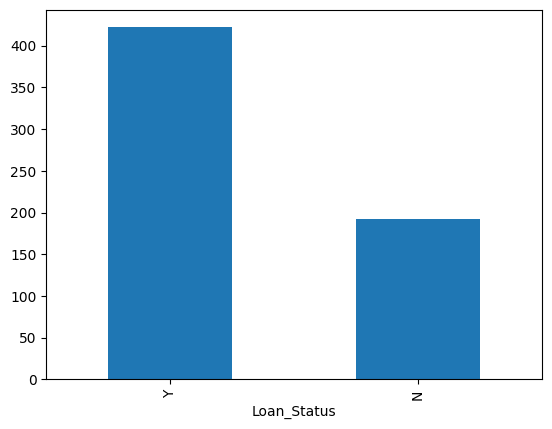

In [13]:
Train["Loan_Status"].value_counts().plot.bar()

In [14]:
Train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
Train['Gender'].fillna(Train['Gender'].mode()[0], inplace=True) 
Train['Married'].fillna(Train['Married'].mode()[0], inplace=True) 
Train['Dependents'].fillna(Train['Dependents'].mode()[0], inplace=True) 
Train['Self_Employed'].fillna(Train['Self_Employed'].mode()[0], inplace=True) 
Train['Credit_History'].fillna(Train['Credit_History'].mode()[0], inplace=True)

In [16]:
Train['LoanAmount'].fillna(Train['LoanAmount'].median(), inplace=True)

In [17]:
Train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
Train['Loan_Amount_Term'].fillna(Train['Loan_Amount_Term'].mode()[0], inplace=True)


In [19]:
Train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

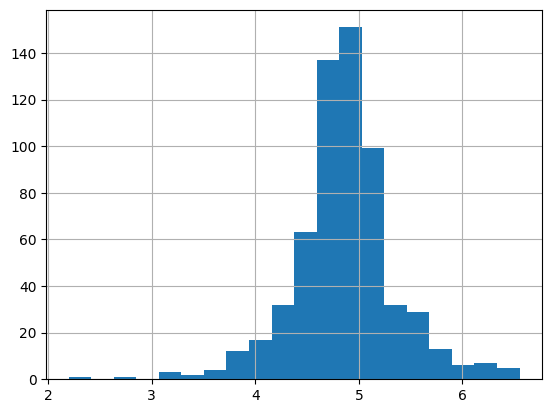

In [20]:
Train['LoanAmount_log'] = np.log(Train['LoanAmount']) 
Train['LoanAmount_log'].hist(bins=20) 
Train['Loan_Status'] = Train['Loan_Status']

In [21]:
Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,1,Y,4.852030
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,N,4.852030
2,LP001005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1,Y,4.189655
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y,4.787492
4,LP001008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,1,Y,4.948760


In [22]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
Train['Gender']	
label_encoder.fit_transform(Train['Gender']) 
Train['Married'] 
label_encoder.fit_transform(Train['Married']) 		
Train['Education']
label_encoder.fit_transform(Train['Education']) 
Train['Self_Employed']	
label_encoder.fit_transform(Train['Self_Employed']) 
Train['Property_Area']	
label_encoder.fit_transform(Train['Property_Area']) 
Train['Loan_Status']	
label_encoder.fit_transform(Train['Loan_Status'])

print(Train.head())


    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0         0.0          1              0   
1  LP001003       1        1         1.0          1              0   
2  LP001005       1        1         0.0          1              1   
3  LP001006       1        1         0.0          0              0   
4  LP001008       1        0         0.0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area Loan_Status  LoanAmount_log  
0             1.0              1           Y        4.852030  
1             1.0         

In [23]:
index = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area','LoanAmount_log',
'Loan_Status',]


In [24]:
Train = Train[index]

In [25]:
X = Train.iloc[:, :-1].values 
y = Train.iloc[:, -1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 1/3, random_state = 0)


In [27]:
y_train

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [28]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
DT = DecisionTreeClassifier(criterion="entropy") 
tree_1 = DT.fit(X_train, y_train)


In [29]:
plt.figure(figsize=(12, 6))
tree.plot_tree(tree_1, filled=True, feature_names=X_train.columns, class_names=True)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 1200x600 with 0 Axes>

In [ ]:
y_pred = DT.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score 
cm = confusion_matrix(y_test, y_pred)
print(cm) 
accuracy_score(y_test, y_pred)


[[ 32  28]
 [ 20 125]]


0.7658536585365854